In [1]:
# install openml library
!pip install openml

# Importing openml library for dataset
import openml

# Importing matplotlib.pyplot library for plotting graphs, figures, etc....
import matplotlib.pyplot as plt

# importing library for split the dataset in train and test
from sklearn.model_selection import train_test_split

# Importing in-built scaler function
from sklearn.preprocessing import MinMaxScaler

# Importing numpy or numeric computation
import numpy as np

# Importing pandas for data manupulation and anaysis
import pandas as pd

# Importing seaborn for Statistical Graphics
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=ee84e9eba53aa8663dac88853003858036266ca1652e5974aa52478156dcce1c
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


### <font color = "orange"> Q1. Load the texture dataset from OpenML: https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=texture&id=40499

In [2]:
# fetching the dataset rom the openml
dataset = openml.datasets.get_dataset(40499)

# fetching the dataset into four variables
X, y, categories, colNames = dataset.get_data(
    # specifying format for the datset as pandas dataframe
    dataset_format="dataframe",
    # defining the target column which is the variable we want to predict
    target=dataset.default_target_attribute
)

# printing the name of datset
print("Dataset Name: ", dataset.name)
# printing some view of the features
print("Some view of Features (X): ")
print(X.head())
# printing some view of the target
print("\nSome view of Target (y): ")
print(y.head())

Dataset Name:  texture
Some view of Features (X): 
      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.223 -0.798 -0.867 -0.639 -0.545 -0.412 -0.795 -0.629 -0.547 -0.868  ...   
1 -1.410 -1.029 -1.013 -0.895 -0.762 -0.676 -1.043 -0.851 -0.775 -1.037  ...   
2 -1.107 -0.649 -0.629 -0.492 -0.367 -0.298 -0.682 -0.478 -0.395 -0.681  ...   
3 -1.270 -0.855 -0.958 -0.707 -0.619 -0.469 -0.872 -0.705 -0.620 -0.988  ...   
4 -1.331 -0.862 -0.761 -0.689 -0.498 -0.361 -0.857 -0.600 -0.496 -0.779  ...   

     V31    V32    V33    V34    V35    V36    V37    V38    V39    V40  
0 -1.223 -0.766 -0.555 -0.714 -0.545 -0.587 -0.871 -0.620 -0.568 -0.607  
1 -1.410 -0.919 -0.770 -0.847 -0.663 -0.723 -1.013 -0.748 -0.698 -0.817  
2 -1.107 -0.692 -0.445 -0.588 -0.371 -0.368 -0.746 -0.457 -0.379 -0.469  
3 -1.270 -0.829 -0.719 -0.774 -0.617 -0.688 -0.937 -0.693 -0.657 -0.779  
4 -1.331 -0.861 -0.571 -0.784 -0.545 -0.562 -0.952 -0.642 -0.578 -0.648  

[5 rows x 40 columns]



### <font color = "orange"> Q2. Show the class distribution of the dataset and state whether the dataset is well balanced or not.

Distribution: 
Class
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
11    500
Name: count, dtype: int64


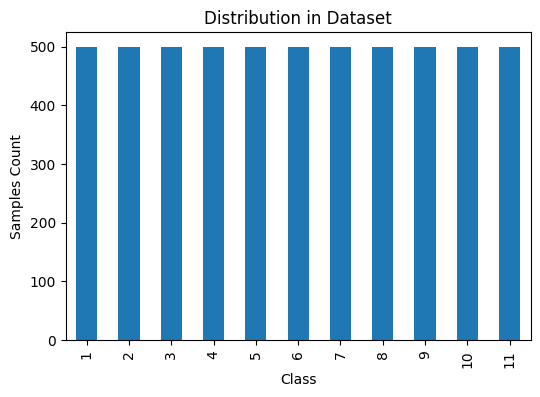

In [3]:
# It is the count of frequency of each unique value in target variable y
counts = y.value_counts()

# printing that counts
print("Distribution: ")
print(counts)

# creating a new figure of size 6x4 inches
plt.figure(figsize=(6, 4))

# as a bar chart
counts.plot(kind='bar')

# x-axis label
plt.xlabel("Class")

# y-axis label
plt.ylabel("Samples Count")

# title of the bar chart
plt.title("Distribution in Dataset")

# displaying the bar chart
plt.show()

### <font color = "orange"> Q3. Split the dataset into training and test sets (80%-20%)

In [4]:
# splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    # INput features
    X,
    # Taget labels
    y,
    # 20% of dataset for testing and 80% of dataset for training
    test_size=0.2,
    random_state=42,
    stratify=y
)

# printing no. of samplse in training set
print("Size of Trainting set: ", X_train.shape[0])

# printing no. of samplse in testing set
print("Size of Testing set: ", X_test.shape[0])

Size of Trainting set:  4400
Size of Testing set:  1100


### <font color = "orange">Q4. Scale the features of the dataset appropriately such that all the features take values in the same range.

In [5]:
# creating MinMaxScaler object to scale features in range of 0 to 1
scalar = MinMaxScaler()

# fit that scaler on training data and transorm
ScaledX_train = scalar.fit_transform(X_train)

# using that scalar to transform test data
ScaledX_test = scalar.transform(X_test)

# printing some rows and cols of original training data
print("Before scalaing: ")
print(X_train.iloc[0:3, 0:5])

# printing some rows and cols after scaling training data
print("After scalaing: ")
print(ScaledX_train[0:3, 0:5])

Before scalaing: 
         V1     V2     V3     V4     V5
5040 -1.213 -0.504 -0.566 -0.261 -0.216
2952 -0.920 -0.448 -0.497 -0.390 -0.378
895  -1.218 -0.682 -0.637 -0.506 -0.354
After scalaing: 
[[0.10656475 0.45490196 0.44981862 0.5        0.56099196]
 [0.23830935 0.49150327 0.49153567 0.42402827 0.45241287]
 [0.10431655 0.33856209 0.40689238 0.3557126  0.46849866]]


### <font color = "orange">Q5. Design a Gaussian Naive Bayes’ (NB) classifier and fit it on the training set

In [6]:
# creating custom Gaussian Naive Bayes classifier class
class GaussianNaiveBayesFromScratch:
    # fit is is training function
    def fit(self, X, y):
        # taking unique class labels
        self.classes = np.unique(y)

        # a dictionary parameter to store mean variance, etc... for each class
        self.parameters = {}

        # for each class compouting mean, variance and prior probability
        for c in self.classes:

            # selecting all rows  which belongs to class 'c'
            X_c = X[y == c]

            # storing mean variance probability for each feature
            self.parameters[c] = {
                # mean of each feature
                "mean": X_c.mean(axis=0),

                # variance of each feature
                "var": X_c.var(axis=0),
                "prior": X_c.shape[0] / X.shape[0]
            }

    # probability density function for guassian distribution
    def probabilityDensityFunction(self, classIndex, x):

        # mean of the class of given class index
        mean = self.parameters[classIndex]["mean"]

        # variance of the class of given class index
        var = self.parameters[classIndex]["var"]

        # gaussian formula
        numerator = np.exp(- (x - mean) ** 2 / (2 * var + 1e-9))
        denominator = np.sqrt(2 * np.pi * var + 1e-9)
        return numerator / denominator

    # prediction function
    def predict(self, X):

        # storing the pedicted calsses
        y_predictClass = []
        for x in X:
            # the list to store posterior prob of each class
            posteriors = []
            for c in self.classes:

                # log of the prior
                prior = np.log(self.parameters[c]["prior"])

                # log of the likelihood
                conditional = np.sum(np.log(self.probabilityDensityFunction(c, x)))

                # log of the posterior
                posterior = prior + conditional
                posteriors.append(posterior)

            # getting class of highest posterior prob
            y_predictClass.append(self.classes[np.argmax(posteriors)])
        return np.array(y_predictClass)


# Train scratch Naice Bayes model
scratchNaiveBayes = GaussianNaiveBayesFromScratch()
scratchNaiveBayes.fit(ScaledX_train, y_train)

print("Custom Gaussian Naive Bayes model trained successfully.")

Custom Gaussian Naive Bayes model trained successfully.


### <font color = "orange">Q6. Evaluate the test set using the Gaussian NB classifier you learned from the training data and report the performance in terms of accuracy, precision, recall and confusion matrix.

In [7]:
# Predict labels for test using custom Naive Batest model
yPredScratch = scratchNaiveBayes.predict(ScaledX_test)

# Calculate accuracy
AccuracyScratch = accuracy_score(y_test, yPredScratch)

# Calculate precision
precisionScratch = precision_score(y_test, yPredScratch, average='weighted')

# Calculate recall
recallScratch = recall_score(y_test, yPredScratch, average='weighted')

# Calculate confuion matrix
confusionMatrixScratch = confusion_matrix(y_test, yPredScratch)


# printing results
print("Custom Gaussian NB Evaluation")
print("Accuracy:", AccuracyScratch)
print("Precision (weighted):", precisionScratch)
print("Recall (weighted):", recallScratch)
print("\nConfusion Matrix:\n", confusionMatrixScratch)

# more report with detail
print("\nClassification Report:\n", classification_report(y_test, yPredScratch))


Custom Gaussian NB Evaluation
Accuracy: 0.7618181818181818
Precision (weighted): 0.7618288932963438
Recall (weighted): 0.7618181818181818

Confusion Matrix:
 [[47 10  0  0  0 10  0  0  0 33  0]
 [18 52  6  0  0 20  0  2  0  2  0]
 [ 2  8 58  0  0  5 15  8  4  0  0]
 [ 0  0  1 96  0  0  3  0  0  0  0]
 [ 0  1  0  0 99  0  0  0  0  0  0]
 [10  6  0  0  2 62  1 16  0  3  0]
 [ 0  1 10  0  0  4 72  4  9  0  0]
 [ 2  0  3  1  0 15 10 68  1  0  0]
 [ 0  0  1  0  0  0  5  0 94  0  0]
 [ 1  0  4  0  0  4  0  0  0 91  0]
 [ 0  0  1  0  0  0  0  0  0  0 99]]

Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.47      0.52       100
          10       0.67      0.52      0.58       100
          11       0.69      0.58      0.63       100
           2       0.99      0.96      0.97       100
           3       0.98      0.99      0.99       100
           4       0.52      0.62      0.56       100
           5       0.68      0.72      0.

### <font color = "orange">Q7. Using scikit-learn's implementation of Gaussian NB classifier, fit the training data.

In [8]:
from sklearn.naive_bayes import GaussianNB

# Initialize scikit-learn Gaussian Naive Bayes model
scikitlNaiveBayes = GaussianNB()

# Training (fit) model on scaled training data
scikitlNaiveBayes.fit(ScaledX_train, y_train)

print("Scikit-learn GaussianNB model trained successfully.")

Scikit-learn GaussianNB model trained successfully.


### <font color="orange">Q8. Evaluate the scikit-learn's Gaussian NB model on the test set. How does the performance of this model compare with your custom implementation?

In [9]:
# Predicting class labels for test set using sklearn Naive Bayes model
yPredScikitl = scikitlNaiveBayes.predict(ScaledX_test)

# Calculate accuracy
accuracyScikitl = accuracy_score(y_test, yPredScikitl)

# Calculate precision
precisionScikitl = precision_score(y_test, yPredScikitl, average='weighted')

# Calculate recall
recallScikitl = recall_score(y_test, yPredScikitl, average='weighted')

# Calculate Confusion matrix
confusionMatrixScikitl = confusion_matrix(y_test, yPredScikitl)

# printing results of sklearn Naive Bayes model
print("Scikit-learn GaussianNB Evaluation")
print("Accuracy:", accuracyScikitl)
print("Precision:", precisionScikitl)
print("Recall:", recallScikitl)
print("\nConfusion Matrix:\n", confusionMatrixScikitl)

# Comparison
print("\nFinal Comparison")
print("Custom Naive Bayes Accuracy:", AccuracyScratch, "-- Sklearn Naive Bayes Accuracy:", accuracyScikitl)
print("Custom Naive Bayes Precision:", precisionScratch, "-- Sklearn Naive Bayes Precision:", precisionScikitl)
print("Custom Naive Bayes Recall:", recallScratch, "-- Sklearn Naive Bayes Recall:", recallScikitl)


Scikit-learn GaussianNB Evaluation
Accuracy: 0.7618181818181818
Precision: 0.7618288932963438
Recall: 0.7618181818181818

Confusion Matrix:
 [[47 10  0  0  0 10  0  0  0 33  0]
 [18 52  6  0  0 20  0  2  0  2  0]
 [ 2  8 58  0  0  5 15  8  4  0  0]
 [ 0  0  1 96  0  0  3  0  0  0  0]
 [ 0  1  0  0 99  0  0  0  0  0  0]
 [10  6  0  0  2 62  1 16  0  3  0]
 [ 0  1 10  0  0  4 72  4  9  0  0]
 [ 2  0  3  1  0 15 10 68  1  0  0]
 [ 0  0  1  0  0  0  5  0 94  0  0]
 [ 1  0  4  0  0  4  0  0  0 91  0]
 [ 0  0  1  0  0  0  0  0  0  0 99]]

Final Comparison
Custom Naive Bayes Accuracy: 0.7618181818181818 -- Sklearn Naive Bayes Accuracy: 0.7618181818181818
Custom Naive Bayes Precision: 0.7618288932963438 -- Sklearn Naive Bayes Precision: 0.7618288932963438
Custom Naive Bayes Recall: 0.7618181818181818 -- Sklearn Naive Bayes Recall: 0.7618181818181818
